In [1]:
# pip install scikit-learn

In [2]:
# Importing libraries
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../dataset/crop_data.csv')
df.head()

,N,P,K,Ph,Temperature(C),Rainfall(cm),Humidity,Crop
0,18,62,19,7.3,29,98,61,pigeonpeas
1,36,60,78,7.4,22,57,62,chickpea
2,103,14,51,6.6,20,50,76,muskmelon
3,76,43,38,6.6,22,148,72,rice
4,32,60,80,7.1,24,58,64,chickpea


In [4]:
df.columns

Index(['N', 'P', 'K', 'Ph', 'Temperature(C)', 'Rainfall(cm)', 'Humidity',
       'Crop'],
      dtype='object')

In [5]:
df['Crop'].unique()

array(['pigeonpeas', 'chickpea', 'muskmelon', 'rice', 'grapes', 'banana',
       'kidneybeans', 'lentil', 'watermelon', 'cotton', 'apple', 'jute',
       'mango', 'coffee', 'maize', 'mothbeans', 'mungbean', 'orange',
       'coconut', 'papaya', 'blackgram', 'pomegranate'], dtype=object)

In [6]:
df.dtypes

N                   int64
P                   int64
K                   int64
Ph                float64
Temperature(C)      int64
Rainfall(cm)        int64
Humidity            int64
Crop               object
dtype: object

In [7]:
df['Crop'].value_counts()

pigeonpeas     1000
chickpea       1000
blackgram      1000
papaya         1000
coconut        1000
orange         1000
mungbean       1000
mothbeans      1000
maize          1000
coffee         1000
mango          1000
jute           1000
apple          1000
cotton         1000
watermelon     1000
lentil         1000
kidneybeans    1000
banana         1000
grapes         1000
rice           1000
muskmelon      1000
pomegranate    1000
Name: Crop, dtype: int64

<AxesSubplot: >

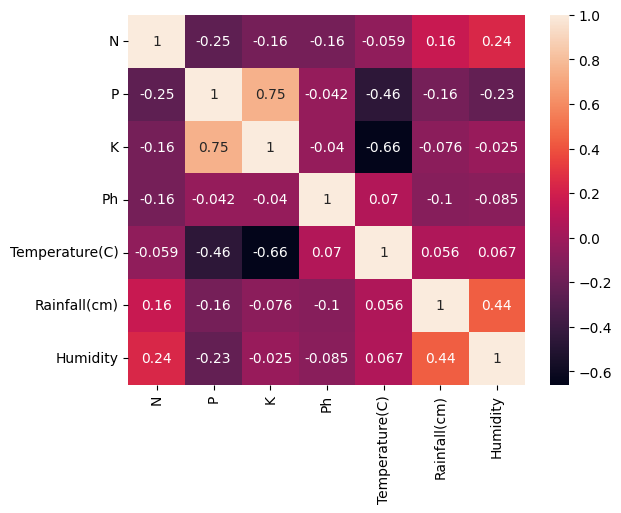

In [8]:
sns.heatmap(df.corr(), annot = True)

### Separating Features and Target labels

In [9]:
features = df[['N', 'P', 'K', 'Ph', 'Temperature(C)', 'Rainfall(cm)', 'Humidity']]
target = df['Crop']
labels = df['Crop']

In [10]:
# Intializing empty lists to append all models names and corresponding name
acc = []
model = []

In [11]:
# Splitting into traing and test data set
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features, target, test_size = 0.2, random_state = 2)

# DECISION TREE

In [12]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy", random_state = 2, max_depth = 5)

DecisionTree.fit(Xtrain, Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x * 100)

print(classification_report(Ytest, predicted_values))

DecisionTrees's Accuracy is:  77.5909090909091
              precision    recall  f1-score   support

       apple       0.94      1.00      0.97       219
      banana       1.00      1.00      1.00       175
   blackgram       0.99      1.00      0.99       199
    chickpea       1.00      1.00      1.00       194
     coconut       0.00      0.00      0.00       214
      coffee       1.00      1.00      1.00       182
      cotton       1.00      1.00      1.00       186
      grapes       1.00      0.92      0.96       183
        jute       1.00      0.53      0.70       225
 kidneybeans       0.00      0.00      0.00       196
      lentil       0.37      1.00      0.54       171
       maize       1.00      1.00      1.00       229
       mango       0.48      1.00      0.65       197
   mothbeans       1.00      0.26      0.41       189
    mungbean       0.60      1.00      0.75       210
   muskmelon       0.49      0.37      0.42       212
      orange       1.00      1.00 

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target, cv = 5)
score

array([0.82090909, 0.81590909, 0.81272727, 0.81727273, 0.81727273])

### Saving Trained Decision Tree model

In [15]:
import pickle
# Dump the trained Decision Tree classifier with Pickle
DT_pkl_filename = '../models/CR(DecisionTree).pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Gaussian Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain, Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x * 100)

print(classification_report(Ytest, predicted_values))

Naive Bayes's Accuracy is:  82.06818181818181
              precision    recall  f1-score   support

       apple       0.99      0.98      0.99       219
      banana       1.00      1.00      1.00       175
   blackgram       0.97      0.95      0.96       199
    chickpea       1.00      1.00      1.00       194
     coconut       0.95      0.99      0.97       214
      coffee       1.00      1.00      1.00       182
      cotton       1.00      1.00      1.00       186
      grapes       0.98      0.99      0.98       183
        jute       0.78      0.67      0.72       225
 kidneybeans       0.44      0.35      0.39       196
      lentil       0.35      0.42      0.38       171
       maize       1.00      1.00      1.00       229
       mango       0.99      0.95      0.97       197
   mothbeans       0.64      0.47      0.54       189
    mungbean       0.62      0.77      0.68       210
   muskmelon       0.52      0.46      0.49       212
      orange       1.00      1.00  

In [17]:
# Cross validation score (Gaussian Naive Bayes)
score = cross_val_score(NaiveBayes, features, target, cv = 5)
score

array([0.82431818, 0.81818182, 0.825     , 0.81477273, 0.82386364])

### Saving trained Gaussian Naive Bayes

In [18]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = '../models/CR(NaiveBayes).pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [19]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel = 'poly', degree = 3, C = 1)
SVM.fit(X_train_norm, Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x * 100)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  82.38636363636364
              precision    recall  f1-score   support

       apple       1.00      0.96      0.98       219
      banana       1.00      1.00      1.00       175
   blackgram       0.97      0.96      0.97       199
    chickpea       1.00      1.00      1.00       194
     coconut       0.95      0.97      0.96       214
      coffee       1.00      1.00      1.00       182
      cotton       1.00      1.00      1.00       186
      grapes       0.96      0.99      0.98       183
        jute       0.83      0.62      0.71       225
 kidneybeans       0.46      0.35      0.40       196
      lentil       0.36      0.56      0.44       171
       maize       1.00      1.00      1.00       229
       mango       0.96      0.94      0.95       197
   mothbeans       0.74      0.38      0.50       189
    mungbean       0.61      0.88      0.72       210
   muskmelon       0.54      0.34      0.42       212
      orange       1.00      1.00      1.00

In [20]:
# Cross validation score (SVM)
score = cross_val_score(SVM, features, target, cv = 5)
score

array([0.79681818, 0.79409091, 0.79590909, 0.79772727, 0.79454545])

### Saving trained SVM Model

In [21]:
import pickle
# Dump the trained SVM classifier with Pickle
SVM_pkl_filename = '../models/CR(SVM).pkl'
# Open the file to save as pkl file
SVM_Model_pkl = open(SVM_pkl_filename, 'wb')
pickle.dump(SVM, SVM_Model_pkl)
# Close the pickle instances
SVM_Model_pkl.close()

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state = 2)

LogReg.fit(Xtrain, Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x * 100)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  79.61363636363636
              precision    recall  f1-score   support

       apple       0.99      0.97      0.98       219
      banana       1.00      1.00      1.00       175
   blackgram       0.96      0.96      0.96       199
    chickpea       1.00      1.00      1.00       194
     coconut       0.96      0.95      0.96       214
      coffee       1.00      1.00      1.00       182
      cotton       0.99      1.00      1.00       186
      grapes       0.97      0.99      0.98       183
        jute       0.73      0.70      0.72       225
 kidneybeans       0.35      0.21      0.27       196
      lentil       0.30      0.32      0.31       171
       maize       0.99      0.99      0.99       229
       mango       0.93      0.92      0.93       197
   mothbeans       0.57      0.55      0.56       189
    mungbean       0.60      0.60      0.60       210
   muskmelon       0.53      0.60      0.57       212
      orange       1.00    

In [23]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg, features, target, cv = 5)
score

array([0.78795455, 0.78590909, 0.78863636, 0.78477273, 0.79181818])

### Saving Trained LR model

In [24]:
import pickle
# Dump the trained Logistic Regression classifier with Pickle
LR_pkl_filename = '../models/CR(LogisticRegression).pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
# LR_Model_pkl.close()

# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 20, random_state = 0)
RF.fit(Xtrain, Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x * 100)

print(classification_report(Ytest, predicted_values))

RF's Accuracy is:  83.3409090909091
              precision    recall  f1-score   support

       apple       1.00      0.99      0.99       219
      banana       1.00      1.00      1.00       175
   blackgram       0.99      0.99      0.99       199
    chickpea       1.00      1.00      1.00       194
     coconut       0.98      0.98      0.98       214
      coffee       1.00      1.00      1.00       182
      cotton       1.00      1.00      1.00       186
      grapes       0.99      0.99      0.99       183
        jute       0.77      0.76      0.76       225
 kidneybeans       0.47      0.51      0.49       196
      lentil       0.42      0.51      0.46       171
       maize       1.00      1.00      1.00       229
       mango       0.98      0.97      0.98       197
   mothbeans       0.59      0.53      0.56       189
    mungbean       0.61      0.66      0.64       210
   muskmelon       0.51      0.55      0.53       212
      orange       1.00      1.00      1.00  

In [26]:
# Cross validation score (Random Forest)
score = cross_val_score(RF, features, target, cv = 5)
score

array([0.83227273, 0.82977273, 0.81863636, 0.82431818, 0.82636364])

### Saving trained Random Forest model

In [27]:
import pickle
# Dump the trained Random Forest classifier with Pickle
RF_pkl_filename = '../models/CR(RandomForest).pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
# RF_Model_pkl.close()

# XGBoost

In [28]:
# pip install xgboost

In [30]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# encode class labels as integers
le = LabelEncoder()
Ytrain_int = le.fit_transform(Ytrain)
Ytest_int = le.transform(Ytest)

XB = xgb.XGBClassifier()
XB.fit(Xtrain, Ytrain_int)

# Make predictions on test data
predicted_values_int = XB.predict(Xtest)

# Convert integer predictions back to string labels
predicted_values = le.inverse_transform(predicted_values_int)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x * 100)

print(classification_report(Ytest, predicted_values))

XGBoost's Accuracy is:  82.45454545454545
              precision    recall  f1-score   support

       apple       0.99      0.98      0.98       219
      banana       1.00      1.00      1.00       175
   blackgram       0.99      1.00      0.99       199
    chickpea       1.00      1.00      1.00       194
     coconut       0.96      0.98      0.97       214
      coffee       1.00      1.00      1.00       182
      cotton       1.00      1.00      1.00       186
      grapes       0.97      0.99      0.98       183
        jute       0.77      0.72      0.74       225
 kidneybeans       0.47      0.42      0.45       196
      lentil       0.40      0.51      0.45       171
       maize       1.00      1.00      1.00       229
       mango       0.98      0.96      0.97       197
   mothbeans       0.60      0.55      0.57       189
    mungbean       0.62      0.67      0.64       210
   muskmelon       0.47      0.42      0.44       212
      orange       1.00      1.00      

### Saving trained XGBoost model

In [36]:
import pickle
# Dump the trained Random Forest classifier with Pickle
XB_pkl_filename = '../models/CR(XGBoost).pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

# Accuracy Comparision

<AxesSubplot: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

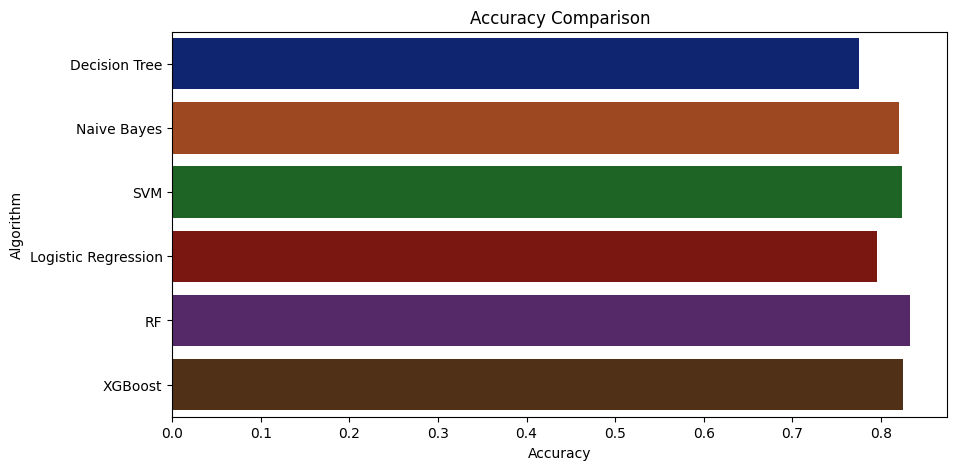

In [31]:
plt.figure(figsize = [10, 5], dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc, y = model, palette = 'dark')

In [32]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.7759090909090909
Naive Bayes --> 0.8206818181818182
SVM --> 0.8238636363636364
Logistic Regression --> 0.7961363636363636
RF --> 0.8334090909090909
XGBoost --> 0.8245454545454546


### Making a Prediction

In [33]:
# Will be using RF
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [34]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['banana']
